In [2]:
# 卷积神经网络的可视化
# 可视化中间激活
from keras.models import load_model

model = load_model('F:/ComputerVision/Keras/cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 128)      

In [3]:
# 预处理单张图像
img_path = 'F:/ComputerVision/Keras/dogs-vs-cats/cats_and_dogs_small/test/cats/cat.1700.jpg'

# 将图像预处理为一个4D张量
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255

# 形状（1， 150， 150， 3）
print(img_tensor.shape)

(1, 150, 150, 3)


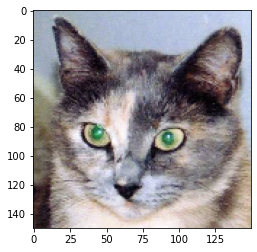

In [4]:
# 显示测试图像
import matplotlib.pyplot as plt 

plt.imshow(img_tensor[0])
plt.show()


In [5]:
# 用一个输入张量和一个输出张量列表将模型实例化
from keras import models

# 提取前8层的输出
layer_outputs = [layer.output for layer in model.layers[:8]]

# 创建一个模型，给定模型输入，可以返回这些输出
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)



In [ ]:
# 以预测模式运行模型
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

In [ ]:
# 将第4和通道可视化
import matplotlib.pyplot as plt 

plt.matshow(first_layer_activation[0, :,:, 4], cmap='viridis')

In [ ]:
# 将第7个通道可视化
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

In [ ]:
# 将每个中间激活的所有通道可视化
layer_names = []
# 显示几层，层数太多会导致崩溃，建议使用jupyter web
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# 显示特征图
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1] # 特征图中特征的个数

    # 特征图的形状为(1, size, size, n_features)
    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row # 在这个矩阵中将激活通道平铺
    display_grid = np.zeros((size * n_cols, images_per_row * size ))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
            row * size : (row + 1) * size] = channel_image

            scale = 1./ size
            plt.figure(figsize=(
                scale * display_grid.shape[1],
                scale * display_grid.shape[0]
            ))
            plt.title(layer_name)
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap='viridis')


